# Predicting Song Genres Using Spotify Data

## Description

This project aims to build a machine learning model that predicts the genre of a song using various metrics provided by Spotify. The goal is to create a predictive model that can  classify the genre of a song based on its features such as danceability, energy, tempo, and other characteristics. Additionally, this project will use the Spotify API to retrieve these song metrics for any new track, allowing us to make predictions on new songs.

### Workflow

1. Collect Data
    
    Build a dataset within Spotify

2. Preprocess Data:

    Clean and preprocess dataset for model training.
3. Train Models:
    


    Train models using the audio metrics as features and genre as target.
    
    Evaluate the model's performance using cross-validation and metrics (accuracy, F1-score).
4. Evaluate Model Performance:

    Check for the effectiveness of the model. Analyze predictions.
5. Integrate Spotify API:
    
6. Make Predictions on New Songs:
    
    Use the trained machine learning model to predict the genre of any new song based on its Spotify audio features.

## Import Libraries

In [189]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.exceptions import SpotifyException
import os
import random

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore') 

## Spotify API Setup

In [191]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.exceptions import SpotifyException
import os


# load_dotenv()
#client_id = '3a94d29a0c704acebccce68cdb1df57c'
#client_secret = '17eb8f75b3224c4ca6b240c6086c7f92'

#client_id = '696a0e977d4e4862845884ca58704754'
#client_secret = '7bcd1ba1db854f56ab58134917fdf516'


client_id = "4e94c7a00ce841cb97a1eb6b94715735"
client_secret = "023e76405fdc4e68af511d30ef91d172"

#client_id = '58ec1b04f4c4442e9c13cacb08db92b7'
#client_secret = 'c8cacceebd8e44bd8e60f86d2a7a38f4'

# Authenticate with Spotify API
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [192]:
# Test
result = sp.search(q='breath away', type='track', limit=1)
print(result)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=breath+away&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0PCCGZ0wGLizHt2KZ7hhA2'}, 'href': 'https://api.spotify.com/v1/artists/0PCCGZ0wGLizHt2KZ7hhA2', 'id': '0PCCGZ0wGLizHt2KZ7hhA2', 'name': 'Artemas', 'type': 'artist', 'uri': 'spotify:artist:0PCCGZ0wGLizHt2KZ7hhA2'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'B

### Retreive Audio Features

In [193]:
def get_audio_features(track_id):
    # get audio features for a specific track
    features = sp.audio_features([track_id])
    return features[0] 

track_id = result['tracks']['items'][0]['id']
audio_features = get_audio_features(track_id)
print(audio_features)  # Replace with actual API call

{'danceability': 0.694, 'energy': 0.712, 'key': 11, 'loudness': -6.522, 'mode': 0, 'speechiness': 0.0759, 'acousticness': 0.707, 'instrumentalness': 0.0202, 'liveness': 0.263, 'valence': 0.233, 'tempo': 146.015, 'type': 'audio_features', 'id': '1oic0Wedm3XeHxwaxmwO91', 'uri': 'spotify:track:1oic0Wedm3XeHxwaxmwO91', 'track_href': 'https://api.spotify.com/v1/tracks/1oic0Wedm3XeHxwaxmwO91', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1oic0Wedm3XeHxwaxmwO91', 'duration_ms': 166849, 'time_signature': 4}


## Building a Dataset

In [194]:
# count = 6
# def search_songs_by_genre(genre, limit=10):
#     global count
#     songs_data = []
#     results = sp.search(q=f'genre:{genre}', type='track', limit=limit, offset=count * random.randint(1, 100))
    
#     for track in results['tracks']['items']:
#         track_id = track['id']
#         audio_features = get_audio_features(track_id)
#         if audio_features:
#             audio_features['genre'] = genre
#             songs_data.append(audio_features)
    
#     return songs_data

# # List of 20 genres
# genres = [
#     'pop', 'rock', 'jazz', 'classical', 'hip-hop', 'metal', 'reggae', 'blues',
#     'country', 'edm', 'latin', 'soul', 'punk', 'folk', 'funk', 'indie', 'disco',
#     'r&b', 'gospel', 'alternative'
# ]

# all_songs_data = []

# for genre in genres:
#     print(f"Collecting songs for genre: {genre}")
#     genre_songs = search_songs_by_genre(genre, limit=25)  
#     all_songs_data.extend(genre_songs)
#     time.sleep(15)

# df = pd.DataFrame(all_songs_data)

# print(df.shape)
# df.info()

In [195]:
df = pd.read_csv('clean_spotify_set_2.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   0                                                                 2959 non-null   int64  
 1   0.7                                                               2959 non-null   float64
 2   0.582                                                             2959 non-null   float64
 3   11.0                                                              2959 non-null   float64
 4   -5.96                                                             2959 non-null   float64
 5   0.0                                                               2959 non-null   float64
 6   0.0356                                                            2959 non-null   float64
 7   0.0502                           

In [196]:
# Rename the columns to appropriate names
new_columns = [
    "danceability", "energy", "key", "loudness", "mode", "speechiness", 
    "acousticness", "instrumentalness", "liveness", "valence", "tempo", 
    "type", "id", "uri", "track_href", "analysis_url", "duration_ms", 
    "time_signature", "genre"
]

# Ensure the first column ('0') is renamed as well, if present
if len(df.columns) == len(new_columns) + 1: 
    new_columns = ['index'] + new_columns 

df.columns = new_columns

df.head()


,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,1,0.747,0.507,2.0,-10.171,1.0,0.0358,0.200,0.060800,0.117,0.438,104.978,audio_features,6dOtVTDdiauQNBQEDOtlAB,spotify:track:6dOtVTDdiauQNBQEDOtlAB,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,https://api.spotify.com/v1/audio-analysis/6dOt...,210373,4,pop
1,2,0.521,0.592,6.0,-7.777,0.0,0.0304,0.308,0.000000,0.122,0.535,157.969,audio_features,2plbrEY59IikOBgBGLjaoe,spotify:track:2plbrEY59IikOBgBGLjaoe,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,https://api.spotify.com/v1/audio-analysis/2plb...,251668,3,pop
2,3,0.674,0.907,3.0,-4.086,1.0,0.0640,0.101,0.000000,0.297,0.721,112.964,audio_features,5G2f63n7IPVPPjfNIGih7Q,spotify:track:5G2f63n7IPVPPjfNIGih7Q,https://api.spotify.com/v1/tracks/5G2f63n7IPVP...,https://api.spotify.com/v1/audio-analysis/5G2f...,157280,4,pop
3,4,0.669,0.586,9.0,-6.073,1.0,0.0540,0.274,0.000000,0.104,0.579,107.071,audio_features,5N3hjp1WNayUPZrA8kJmJP,spotify:track:5N3hjp1WNayUPZrA8kJmJP,https://api.spotify.com/v1/tracks/5N3hjp1WNayU...,https://api.spotify.com/v1/audio-analysis/5N3h...,186365,4,pop
4,5,0.701,0.760,0.0,-5.478,1.0,0.0285,0.107,0.000065,0.185,0.690,103.969,audio_features,2qSkIjg1o9h3YT9RAgYN75,spotify:track:2qSkIjg1o9h3YT9RAgYN75,https://api.spotify.com/v1/tracks/2qSkIjg1o9h3...,https://api.spotify.com/v1/audio-analysis/2qSk...,175459,4,pop


In [197]:
df['genre'].value_counts()

genre
latin          150
rock           150
gospel         150
r&b            150
disco          150
indie          150
folk           150
punk           150
soul           150
alternative    150
edm            150
blues          150
reggae         150
metal          150
classical      150
jazz           150
pop            149
funk           140
hip-hop        140
country        130
Name: count, dtype: int64

In [198]:
genres = [
    'pop', 'rock', 'jazz', 'classical', 'hip-hop', 'metal', 'reggae', 'blues',
    'country', 'edm', 'latin', 'soul', 'punk', 'folk', 'funk', 'indie', 'disco',
    'r&b', 'gospel', 'alternative'
]

In [199]:
# # Append new API call data to dataset file trying to take into account possible data mismatch issues.
# try:
#     df.query("genre in @genres").drop(columns='Unnamed: 0').reset_index(drop=True).to_csv('clean_spotify_set_2.csv', mode='a', 
#                                                                                           header=False, index=True)
# except:
#     df.query("genre in @genres").reset_index(drop=True).to_csv('clean_spotify_set_2.csv', mode='a', header=False, index=True)

In [200]:
# The below aggregate score was added in the course of testing, but only produced marginal and mixed effects on models.
# df['weighted_score'] = df['duration_ms']* 3 + 0.2 * df['danceability']  + 0.2 * df['energy']+ 0.2 * df['valence']

In [201]:
# Check if repeated API calls added duplicate tracks in a temporary dataframe and remove them.
print(df.duplicated().sum())
df1 = df.drop_duplicates().reset_index(drop=True)
df1.info()

1479
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1480 non-null   int64  
 1   danceability      1480 non-null   float64
 2   energy            1480 non-null   float64
 3   key               1480 non-null   float64
 4   loudness          1480 non-null   float64
 5   mode              1480 non-null   float64
 6   speechiness       1480 non-null   float64
 7   acousticness      1480 non-null   float64
 8   instrumentalness  1480 non-null   float64
 9   liveness          1480 non-null   float64
 10  valence           1480 non-null   float64
 11  tempo             1480 non-null   float64
 12  type              1480 non-null   object 
 13  id                1480 non-null   object 
 14  uri               1480 non-null   object 
 15  track_href        1480 non-null   object 
 16  analysis_url      1480 non-null   obj

In [202]:
df = df1.copy()

In [203]:
df.head(10)

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,1,0.747,0.507,2.0,-10.171,1.0,0.0358,0.20000,0.060800,0.1170,0.438,104.978,audio_features,6dOtVTDdiauQNBQEDOtlAB,spotify:track:6dOtVTDdiauQNBQEDOtlAB,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,https://api.spotify.com/v1/audio-analysis/6dOt...,210373,4,pop
1,2,0.521,0.592,6.0,-7.777,0.0,0.0304,0.30800,0.000000,0.1220,0.535,157.969,audio_features,2plbrEY59IikOBgBGLjaoe,spotify:track:2plbrEY59IikOBgBGLjaoe,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,https://api.spotify.com/v1/audio-analysis/2plb...,251668,3,pop
2,3,0.674,0.907,3.0,-4.086,1.0,0.0640,0.10100,0.000000,0.2970,0.721,112.964,audio_features,5G2f63n7IPVPPjfNIGih7Q,spotify:track:5G2f63n7IPVPPjfNIGih7Q,https://api.spotify.com/v1/tracks/5G2f63n7IPVP...,https://api.spotify.com/v1/audio-analysis/5G2f...,157280,4,pop
3,4,0.669,0.586,9.0,-6.073,1.0,0.0540,0.27400,0.000000,0.1040,0.579,107.071,audio_features,5N3hjp1WNayUPZrA8kJmJP,spotify:track:5N3hjp1WNayUPZrA8kJmJP,https://api.spotify.com/v1/tracks/5N3hjp1WNayU...,https://api.spotify.com/v1/audio-analysis/5N3h...,186365,4,pop
4,5,0.701,0.760,0.0,-5.478,1.0,0.0285,0.10700,0.000065,0.1850,0.690,103.969,audio_features,2qSkIjg1o9h3YT9RAgYN75,spotify:track:2qSkIjg1o9h3YT9RAgYN75,https://api.spotify.com/v1/tracks/2qSkIjg1o9h3...,https://api.spotify.com/v1/audio-analysis/2qSk...,175459,4,pop
5,6,0.742,0.757,6.0,-4.981,1.0,0.0421,0.01870,0.000000,0.3050,0.957,139.982,audio_features,4xdBrk0nFZaP54vvZj0yx7,spotify:track:4xdBrk0nFZaP54vvZj0yx7,https://api.spotify.com/v1/tracks/4xdBrk0nFZaP...,https://api.spotify.com/v1/audio-analysis/4xdB...,184841,4,pop
6,7,0.739,0.727,11.0,-5.968,0.0,0.0426,0.06780,0.000000,0.1040,0.676,94.990,audio_features,1UHS8Rf6h5Ar3CDWRd3wjF,spotify:track:1UHS8Rf6h5Ar3CDWRd3wjF,https://api.spotify.com/v1/tracks/1UHS8Rf6h5Ar...,https://api.spotify.com/v1/audio-analysis/1UHS...,171870,4,pop
7,8,0.610,0.650,6.0,-6.199,1.0,0.0474,0.39900,0.000000,0.1100,0.507,106.719,audio_features,1k2pQc5i348DCHwbn5KTdc,spotify:track:1k2pQc5i348DCHwbn5KTdc,https://api.spotify.com/v1/tracks/1k2pQc5i348D...,https://api.spotify.com/v1/audio-analysis/1k2p...,258035,4,pop
8,9,0.638,0.855,7.0,-4.860,1.0,0.0264,0.00757,0.000000,0.2450,0.731,127.986,audio_features,7221xIgOnuakPdLqT0F3nP,spotify:track:7221xIgOnuakPdLqT0F3nP,https://api.spotify.com/v1/tracks/7221xIgOnuak...,https://api.spotify.com/v1/audio-analysis/7221...,178206,4,pop
9,10,0.657,0.820,9.0,-4.448,1.0,0.0441,0.01760,0.000000,0.0847,0.709,124.041,audio_features,7FOgcfdz9Nx5V9lCNXdBYv,spotify:track:7FOgcfdz9Nx5V9lCNXdBYv,https://api.spotify.com/v1/tracks/7FOgcfdz9Nx5...,https://api.spotify.com/v1/audio-analysis/7FOg...,192721,4,pop


In [204]:
df.sample(10)

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
214,215,0.492,0.673,6.0,-5.431,1.0,0.0347,0.413000,0.000000,0.1370,0.488,203.812,audio_features,7K3BhSpAxZBznislvUMVtn,spotify:track:7K3BhSpAxZBznislvUMVtn,https://api.spotify.com/v1/tracks/7K3BhSpAxZBz...,https://api.spotify.com/v1/audio-analysis/7K3B...,163855,4,country
311,312,0.550,0.917,0.0,-3.159,1.0,0.0638,0.004280,0.000000,0.1970,0.601,126.115,audio_features,6TfBA04WJ3X1d1wXhaCFVT,spotify:track:6TfBA04WJ3X1d1wXhaCFVT,https://api.spotify.com/v1/tracks/6TfBA04WJ3X1...,https://api.spotify.com/v1/audio-analysis/6TfB...,177827,4,punk
688,689,0.520,0.981,2.0,-2.750,1.0,0.0905,0.000867,0.001770,0.1970,0.634,158.930,audio_features,2nIulsLMiP2SMTDrtxfQXX,spotify:track:2nIulsLMiP2SMTDrtxfQXX,https://api.spotify.com/v1/tracks/2nIulsLMiP2S...,https://api.spotify.com/v1/audio-analysis/2nIu...,240572,4,blues
1096,1097,0.468,0.652,0.0,-4.912,1.0,0.0722,0.333000,0.000318,0.5500,0.390,140.223,audio_features,3EG9FJ0ToLfgnc1IG2Z1wz,spotify:track:3EG9FJ0ToLfgnc1IG2Z1wz,https://api.spotify.com/v1/tracks/3EG9FJ0ToLfg...,https://api.spotify.com/v1/audio-analysis/3EG9...,588139,4,hip-hop
196,197,0.630,0.552,9.0,-9.280,1.0,0.0545,0.373000,0.000058,0.1030,0.518,143.868,audio_features,0P7DoyGrr4Wp9w5TotEtUC,spotify:track:0P7DoyGrr4Wp9w5TotEtUC,https://api.spotify.com/v1/tracks/0P7DoyGrr4Wp...,https://api.spotify.com/v1/audio-analysis/0P7D...,274493,4,blues
1127,1128,0.398,0.939,9.0,-2.865,0.0,0.0648,0.005910,0.000881,0.3570,0.235,92.027,audio_features,5hheGdf1cb4rK0FNiedCfK,spotify:track:5hheGdf1cb4rK0FNiedCfK,https://api.spotify.com/v1/tracks/5hheGdf1cb4r...,https://api.spotify.com/v1/audio-analysis/5hhe...,342821,4,metal
203,204,0.486,0.702,1.0,-5.758,0.0,0.0298,0.239000,0.000075,0.0912,0.382,81.053,audio_features,7Fzl7QaTu47WyP9R5S5mh5,spotify:track:7Fzl7QaTu47WyP9R5S5mh5,https://api.spotify.com/v1/tracks/7Fzl7QaTu47W...,https://api.spotify.com/v1/audio-analysis/7Fzl...,198069,4,country
851,852,0.489,0.866,10.0,-7.433,1.0,0.0933,0.753000,0.000000,0.8760,0.416,138.630,audio_features,2ZNTPtYmAhN9vCwnAgqKn1,spotify:track:2ZNTPtYmAhN9vCwnAgqKn1,https://api.spotify.com/v1/tracks/2ZNTPtYmAhN9...,https://api.spotify.com/v1/audio-analysis/2ZNT...,268560,4,funk
364,365,0.816,0.775,11.0,-3.323,1.0,0.2340,0.160000,0.000310,0.0543,0.527,93.431,audio_features,503OTo2dSqe7qk76rgsbep,spotify:track:503OTo2dSqe7qk76rgsbep,https://api.spotify.com/v1/tracks/503OTo2dSqe7...,https://api.spotify.com/v1/audio-analysis/503O...,270587,4,funk
1016,1017,0.554,0.980,4.0,-3.514,1.0,0.1080,0.127000,0.000000,0.0833,0.611,135.120,audio_features,4Yf5bqU3NK4kNOypcrLYwU,spotify:track:4Yf5bqU3NK4kNOypcrLYwU,https://api.spotify.com/v1/tracks/4Yf5bqU3NK4k...,https://api.spotify.com/v1/audio-analysis/4Yf5...,162107,4,rock


In [205]:
df['type'].value_counts(normalize=True)

type
audio_features    1.0
Name: proportion, dtype: float64

df['type'] is used to ensure that dataset is formatted and loaded correctly since 'audio_features' should be the only value in the column.

In [206]:
df['genre'].value_counts()

genre
pop            75
rock           75
gospel         75
r&b            75
disco          75
indie          75
folk           75
punk           75
soul           75
latin          75
edm            75
blues          75
reggae         75
metal          75
classical      75
jazz           75
alternative    75
funk           70
hip-hop        70
country        65
Name: count, dtype: int64

In [207]:
top_ten_genres = ['classical', 'gospel', 'folk', 'metal', 'disco', 'punk', 'edm', 'reggae', 'jazz', 'latin']
df = df.loc[df['genre'].isin(top_ten_genres)].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             750 non-null    int64  
 1   danceability      750 non-null    float64
 2   energy            750 non-null    float64
 3   key               750 non-null    float64
 4   loudness          750 non-null    float64
 5   mode              750 non-null    float64
 6   speechiness       750 non-null    float64
 7   acousticness      750 non-null    float64
 8   instrumentalness  750 non-null    float64
 9   liveness          750 non-null    float64
 10  valence           750 non-null    float64
 11  tempo             750 non-null    float64
 12  type              750 non-null    object 
 13  id                750 non-null    object 
 14  uri               750 non-null    object 
 15  track_href        750 non-null    object 
 16  analysis_url      750 non-null    object 
 1

In [208]:
df['genre'].value_counts()

genre
jazz         75
classical    75
metal        75
reggae       75
edm          75
latin        75
punk         75
folk         75
disco        75
gospel       75
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

Several graphs are constructed in this section to explore the fields' correlations and colinearity to each other and the target. Histograms plot the fields' distributions/dispersions for each explored genre.

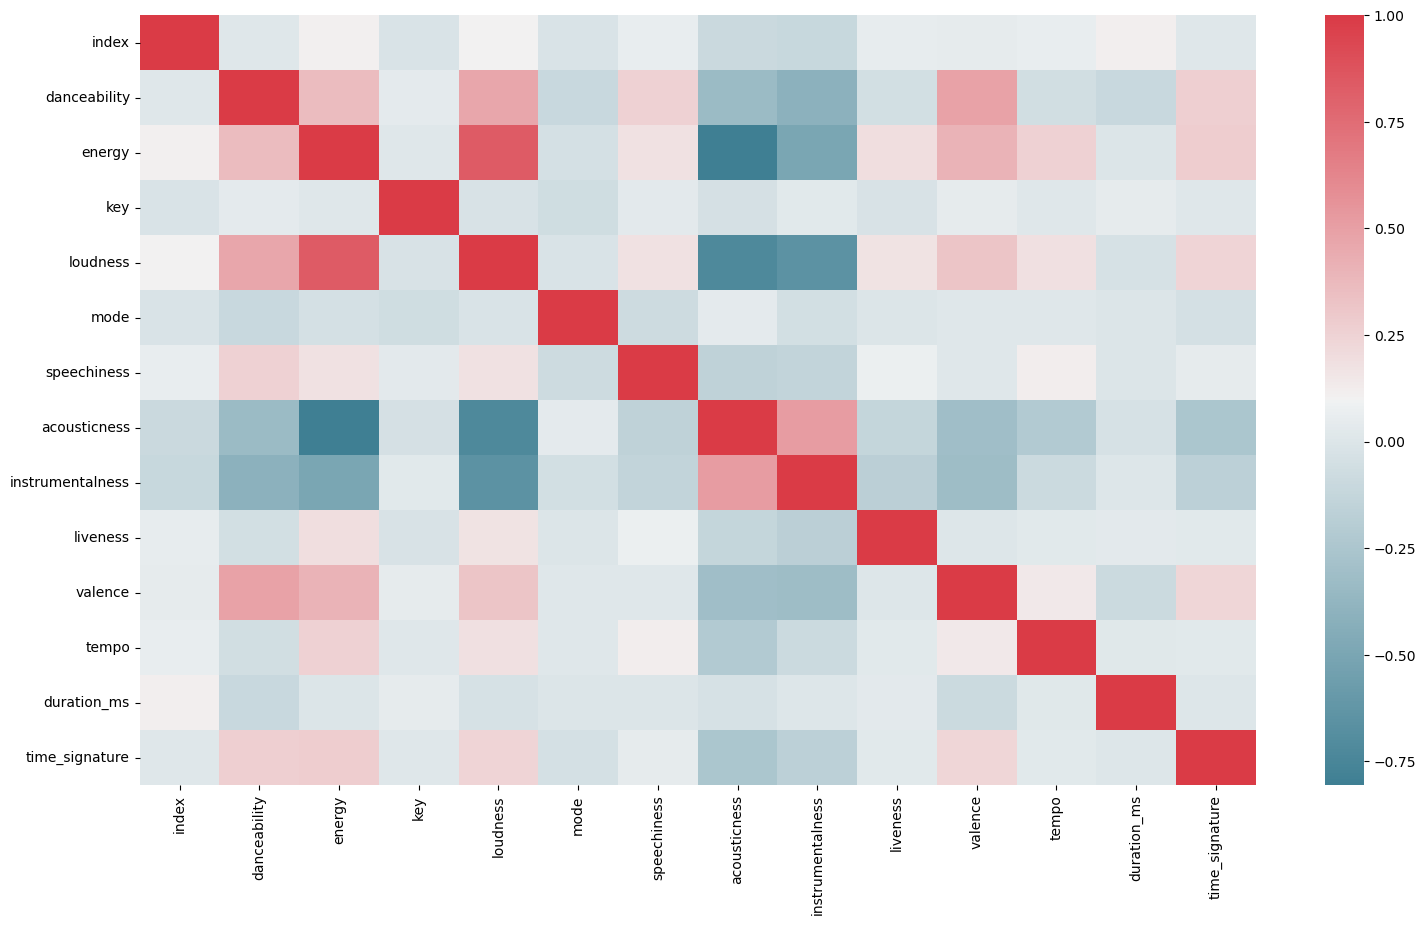

In [209]:
numerical_columns = df.select_dtypes(include=[np.number])
corr = numerical_columns.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

Heatmap shows that the most highly correlated fields to the target would be energy and loudness. Danceability and speechiness look to to have about a .25 or .3 correlation to our target. There exists mulitcollinear features like energy and loudness, but we will continue to can use both of them for boosted and decision tree based models.

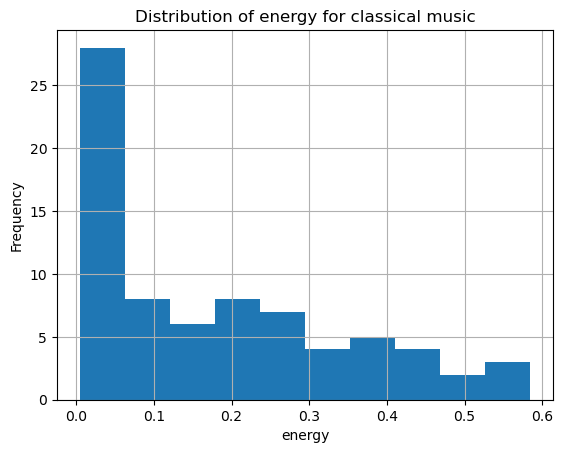

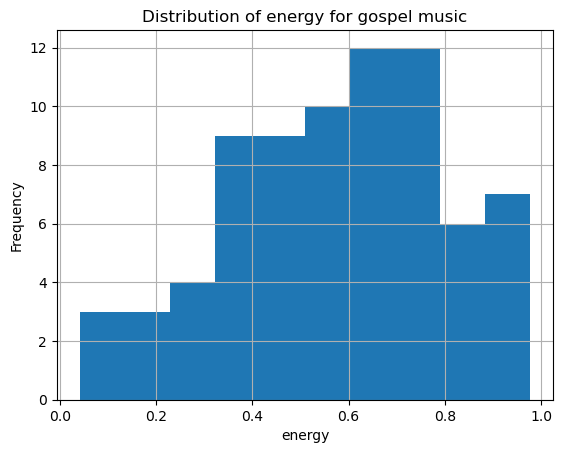

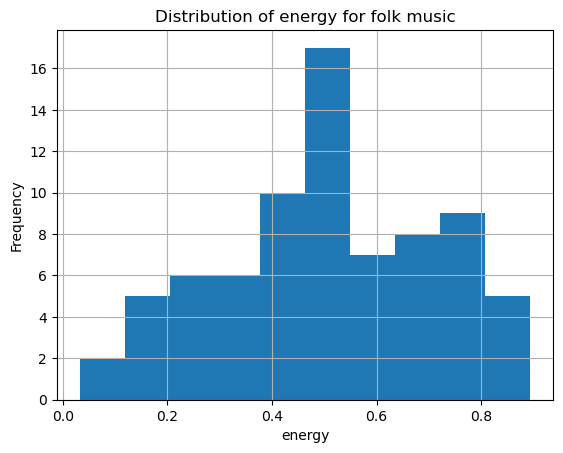

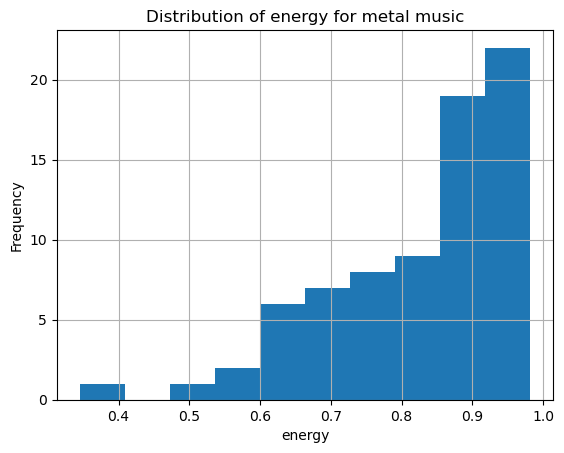

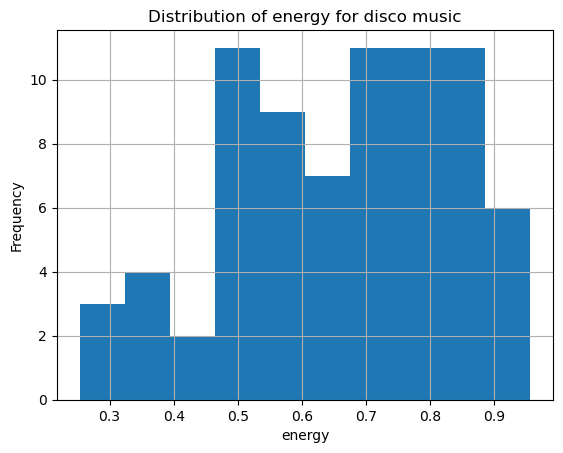

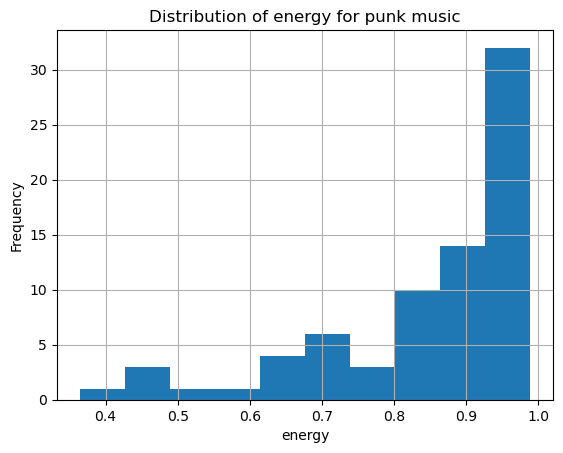

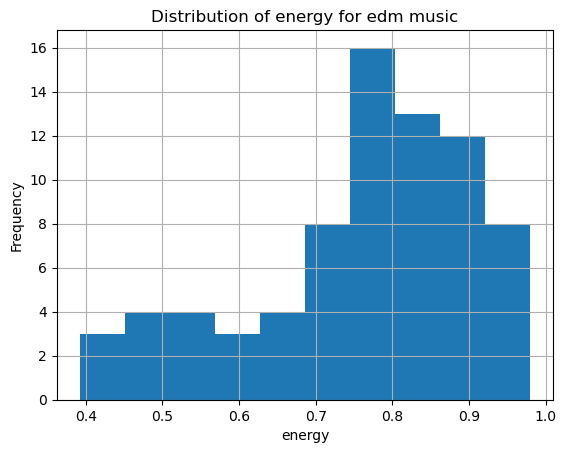

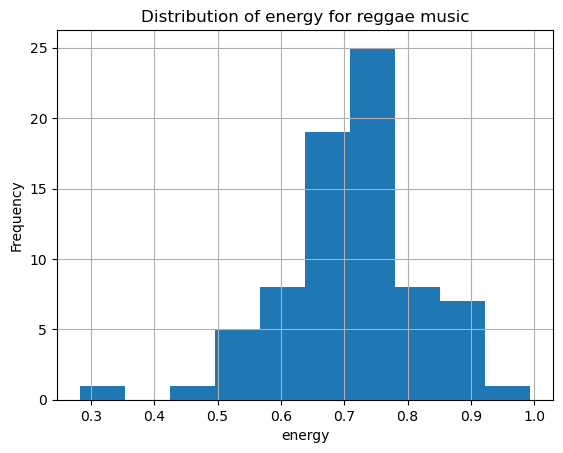

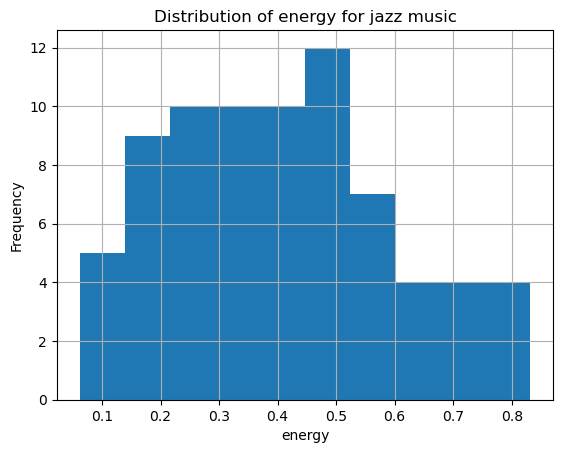

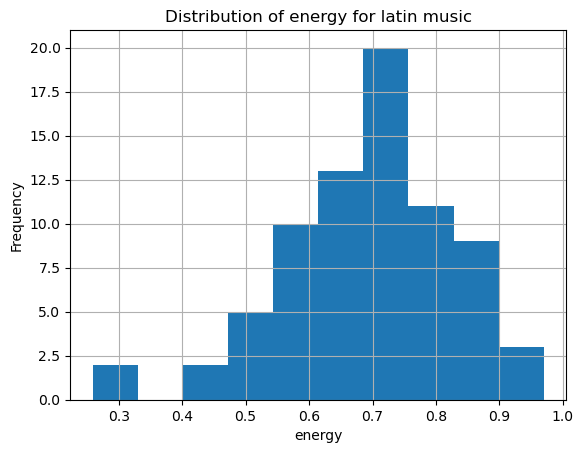

In [210]:
for genre in top_ten_genres:
    subset = df.loc[df['genre']==genre]
    subset['energy'].hist()
    plt.xlabel('energy')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of energy for {genre} music')
    plt.show()

Distribution of metrics for the classical genre.


<Figure size 1000x600 with 0 Axes>

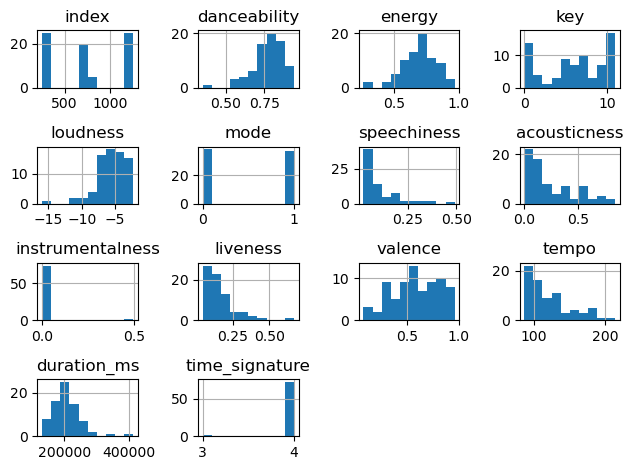

Distribution of metrics for the gospel genre.


<Figure size 1000x600 with 0 Axes>

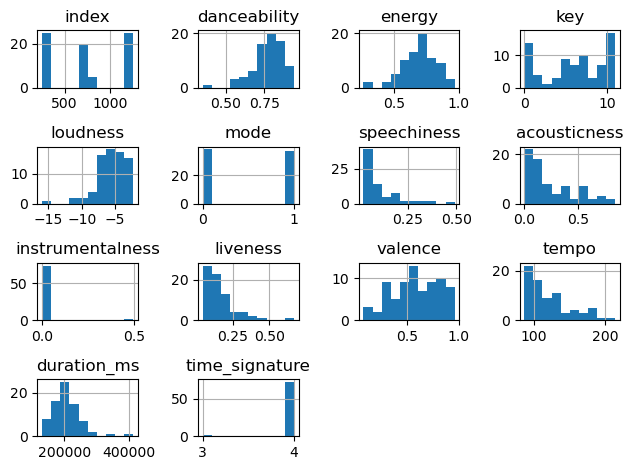

Distribution of metrics for the folk genre.


<Figure size 1000x600 with 0 Axes>

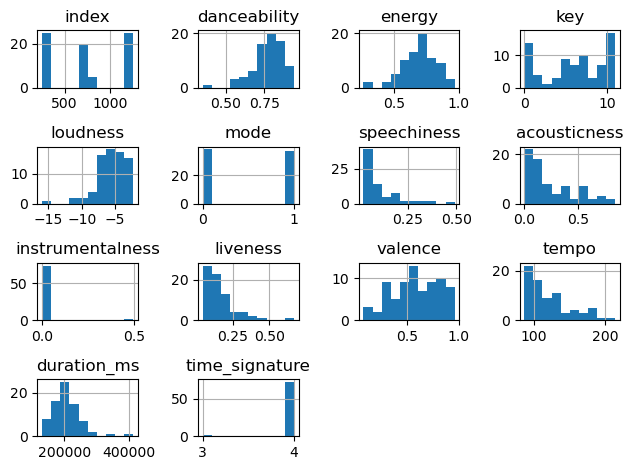

Distribution of metrics for the metal genre.


<Figure size 1000x600 with 0 Axes>

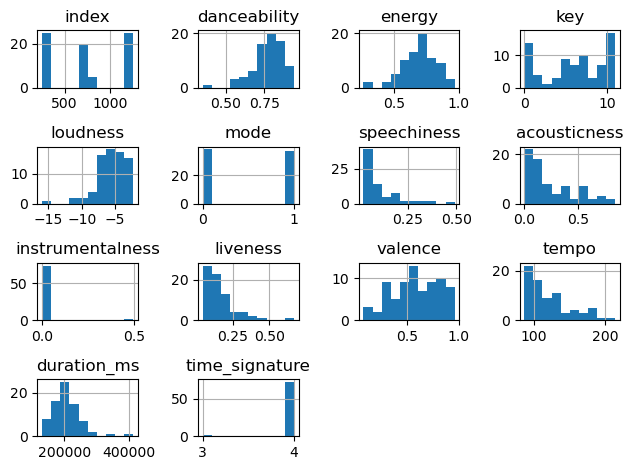

Distribution of metrics for the disco genre.


<Figure size 1000x600 with 0 Axes>

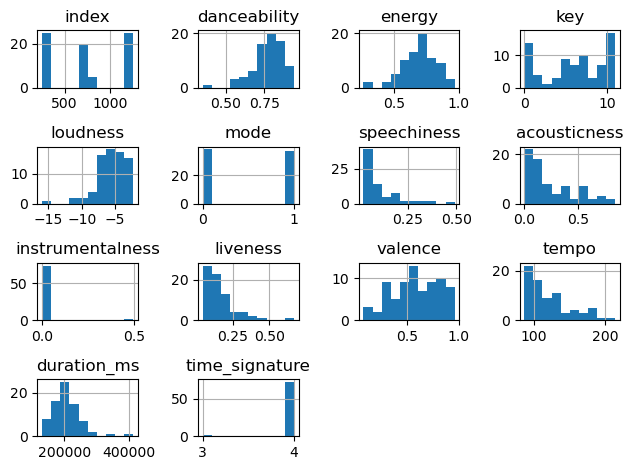

Distribution of metrics for the punk genre.


<Figure size 1000x600 with 0 Axes>

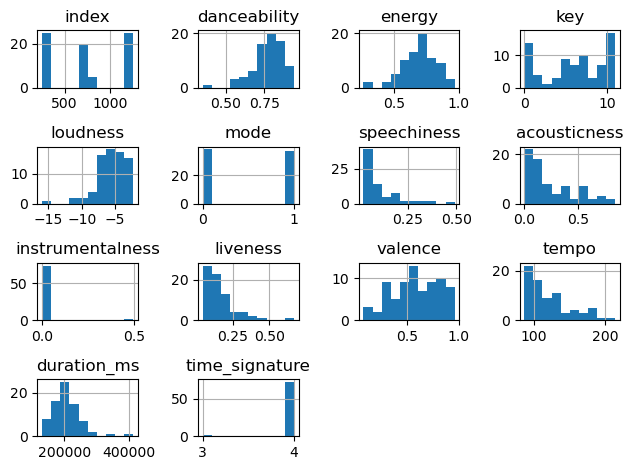

Distribution of metrics for the edm genre.


<Figure size 1000x600 with 0 Axes>

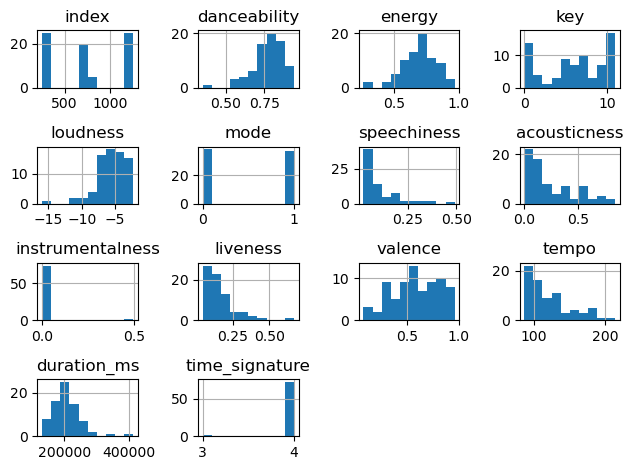

Distribution of metrics for the reggae genre.


<Figure size 1000x600 with 0 Axes>

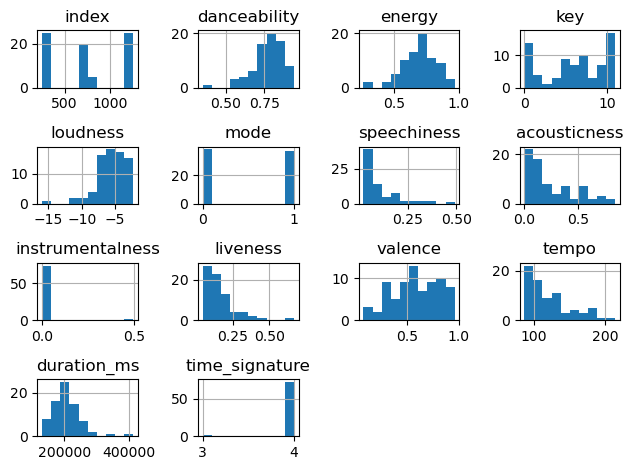

Distribution of metrics for the jazz genre.


<Figure size 1000x600 with 0 Axes>

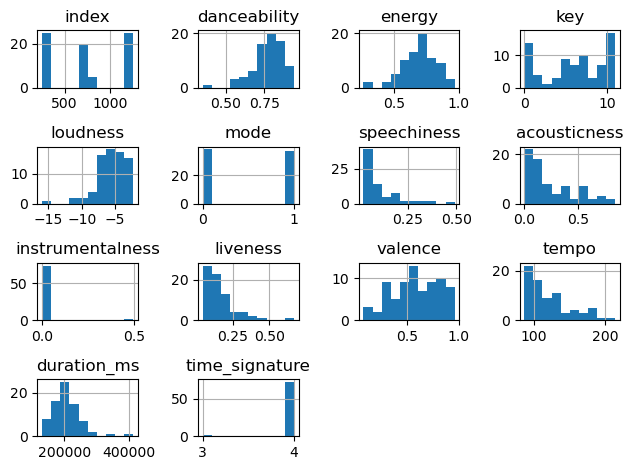

Distribution of metrics for the latin genre.


<Figure size 1000x600 with 0 Axes>

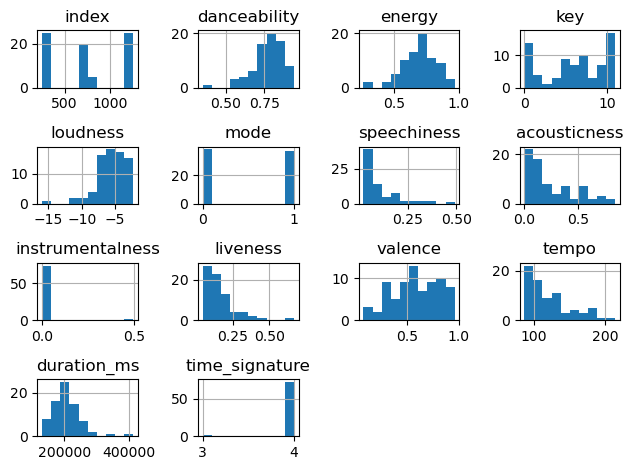

CPU times: user 17.8 s, sys: 1.14 s, total: 18.9 s
Wall time: 17.4 s


In [211]:
%%time

df_subset = df.drop(['id', 'uri', 'track_href', 'analysis_url', 'type'], axis=1)
for genre in top_ten_genres:
    # Filter the DataFrame for the current genre
    genre_data = df_subset[df_subset['genre'] == genre]

    print(f'Distribution of metrics for the {genre} genre.')
    plt.figure(figsize=(10, 6))  
    subset.hist(bins=10)
    plt.tight_layout()
    plt.show()

There's a pretty wide distribution of numeric features between genres. Given we get our data from Spotify's API, we do not have to worry about nulls and outliers. The biggest thing that could be improved on would be the number of samples for each genre. Each successful call of the API and running of the notebook adds data to the github dataset and then reads that file to ensure that if the API is maxed out, a person can still run the code and have data for the models. 

## Data Preprocessing

In [212]:
f1_list, auc_roc_list, accuracy_list, model_list = [], [], [], []

In [213]:
def record_metrics(y_test, predictions, model, X_test):
    f1_list.append(f1_score(y_test, predictions, average='macro'))
    accuracy_list.append(accuracy_score(y_test, predictions))
    try: # Support Vector Machines are not compatible with roc_auc, hence this try block.
        auc_roc_list.append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    except:
        auc_roc_list.append(np.nan)

In [214]:
def preprocess_data(df):
    df = df.drop(['id', 'uri', 'track_href', 'analysis_url', 'type'], axis=1)
    
    df = df.dropna()
    
    # Label encode the genre column
    label_encoder = LabelEncoder()
    df['genre'] = label_encoder.fit_transform(df['genre'])
    
    
    X = df.drop(['genre'], axis=1)
    y = df['genre']
    
    # Normalize feature values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y, label_encoder

X, y, label_encoder = preprocess_data(df)


## Train Machine Learning Model


In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine (SVM)": SVC(kernel='linear'),  
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

model_performance = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    # Generate classification report
    print(f"Classification Report for {model_name}:")
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    print(report)
    
    model_performance[model_name] = report
    record_metrics(y_test, y_pred, model, X_test)
    model_list.append(f'{model_name}')

class_names = label_encoder.classes_

Training Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

   classical       0.81      0.89      0.85        19
       disco       0.72      0.57      0.63        23
         edm       0.64      0.59      0.62        27
        folk       0.52      0.62      0.57        21
      gospel       0.75      0.60      0.67        25
        jazz       0.50      0.60      0.55        20
       latin       0.44      0.50      0.47        22
       metal       0.62      0.75      0.68        24
        punk       0.55      0.65      0.59        17
      reggae       0.56      0.37      0.44        27

    accuracy                           0.60       225
   macro avg       0.61      0.61      0.61       225
weighted avg       0.61      0.60      0.60       225

Training Support Vector Machine (SVM)...
Classification Report for Support Vector Machine (SVM):
              precision    recall  f1-score   support

   classical       0.7

### Support Vector Machine with PCA

In [216]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_svm_pca = SVC(kernel='linear')
model_svm_pca.fit(X_train_pca, y_train)
y_pred_svm_pca = model_svm_pca.predict(X_test_pca)

print("SVM with PCA Classification Report:")
print(classification_report(y_test, y_pred_svm_pca, target_names=class_names))
record_metrics(y_test, y_pred, model, X_test)
model_list.append("SVM with PCA")

SVM with PCA Classification Report:
              precision    recall  f1-score   support

   classical       0.78      0.95      0.86        19
       disco       0.33      0.35      0.34        23
         edm       0.40      0.37      0.38        27
        folk       0.32      0.57      0.41        21
      gospel       0.50      0.28      0.36        25
        jazz       0.47      0.40      0.43        20
       latin       0.20      0.18      0.19        22
       metal       0.46      0.46      0.46        24
        punk       0.41      0.53      0.46        17
      reggae       0.28      0.19      0.22        27

    accuracy                           0.41       225
   macro avg       0.41      0.43      0.41       225
weighted avg       0.41      0.41      0.40       225



### RandomForest with class weights

In [217]:
# Random Forest with class weights
model_rf_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_rf_weighted.fit(X_train, y_train)
y_pred_rf_weighted = model_rf_weighted.predict(X_test)

# Ensure class names are defined correctly
class_names = label_encoder.classes_  # Extract genre names from the label encoder

# Print classification report
print("Random Forest with Class Weights Classification Report:")
print(classification_report(y_test, y_pred_rf_weighted, target_names=class_names))

# Call `record_metrics` with the correct predictions and model
record_metrics(y_test, y_pred_rf_weighted, model_rf_weighted, X_test)

# Append model name to the model list
model_list.append("Random Forest with class weights")


Random Forest with Class Weights Classification Report:
              precision    recall  f1-score   support

   classical       0.81      0.89      0.85        19
       disco       0.74      0.61      0.67        23
         edm       0.61      0.74      0.67        27
        folk       0.57      0.62      0.59        21
      gospel       0.71      0.68      0.69        25
        jazz       0.65      0.75      0.70        20
       latin       0.52      0.50      0.51        22
       metal       0.72      0.75      0.73        24
        punk       0.55      0.65      0.59        17
      reggae       0.62      0.37      0.47        27

    accuracy                           0.65       225
   macro avg       0.65      0.66      0.65       225
weighted avg       0.65      0.65      0.64       225



### CatBoostClassifier

In [218]:
label_encoder = LabelEncoder()
df['genre'] = label_encoder.fit_transform(df['genre'])

X = df.drop(['genre'], axis=1)
y = df['genre']
categorical_features = ['id', 'uri', 'track_href', 'analysis_url', 'type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

catboost_model = CatBoostClassifier(iterations=500,
                          learning_rate=0.1,
                          depth=6,
                          eval_metric='Accuracy',
                          random_seed=42,
                          verbose=50, 
                          cat_features=categorical_features)

catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100)

predictions = catboost_model.predict(X_test)

print("CatBoostClassifier with Class Weights Classification Report:")
print(classification_report(y_test, predictions, target_names=class_names))
record_metrics(y_test, predictions, catboost_model, X_test)
model_list.append("CatBoostClassifier")

0:	learn: 0.4076190	test: 0.2888889	best: 0.2888889 (0)	total: 14.5ms	remaining: 7.23s
50:	learn: 0.8266667	test: 0.5866667	best: 0.5955556 (45)	total: 613ms	remaining: 5.4s
100:	learn: 0.9409524	test: 0.7511111	best: 0.7511111 (97)	total: 1.19s	remaining: 4.71s
150:	learn: 0.9809524	test: 0.8355556	best: 0.8355556 (150)	total: 1.77s	remaining: 4.09s
200:	learn: 0.9923810	test: 0.8888889	best: 0.8933333 (194)	total: 2.35s	remaining: 3.49s
250:	learn: 1.0000000	test: 0.9200000	best: 0.9200000 (245)	total: 2.91s	remaining: 2.88s
300:	learn: 1.0000000	test: 0.9244444	best: 0.9244444 (270)	total: 3.46s	remaining: 2.29s
350:	learn: 1.0000000	test: 0.9333333	best: 0.9377778 (316)	total: 4.02s	remaining: 1.71s
400:	learn: 1.0000000	test: 0.9377778	best: 0.9377778 (316)	total: 4.59s	remaining: 1.13s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9377777778
bestIteration = 316

Shrink model to first 317 iterations.
CatBoostClassifier with Class Weights Classification Repor

### LogisticRegression

In [219]:
X, y, label_encoder = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(max_iter=1000, multi_class="multinomial")
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

print("LogisticRegression with Class Weights Classification Report:")
print(f1_score(y_test, lr_predictions, average='weighted'))
print(classification_report(y_test, lr_predictions, target_names=class_names))
record_metrics(y_test, lr_predictions, lr, X_test)
model_list.append("LogisticRegression")

LogisticRegression with Class Weights Classification Report:
0.45284243639690797
              precision    recall  f1-score   support

   classical       0.81      0.89      0.85        19
       disco       0.47      0.39      0.43        23
         edm       0.48      0.41      0.44        27
        folk       0.38      0.52      0.44        21
      gospel       0.50      0.32      0.39        25
        jazz       0.48      0.50      0.49        20
       latin       0.30      0.32      0.31        22
       metal       0.50      0.62      0.56        24
        punk       0.35      0.41      0.38        17
      reggae       0.35      0.30      0.32        27

    accuracy                           0.46       225
   macro avg       0.46      0.47      0.46       225
weighted avg       0.46      0.46      0.45       225



### KNeighborsClassifier

In [220]:
X, y, label_encoder = preprocess_data(df)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kn = KNeighborsClassifier(n_neighbors=5, weights='distance', 
                          algorithm='auto', leaf_size=10, p=2, 
                          metric='minkowski', metric_params=None, n_jobs=None)
kn.fit(X_train, y_train)
kn_predictions = kn.predict(X_test)

# Print classification report
print("KNeighborsClassifier with Class Weights Classification Report:")
print(f"F1 Score (Weighted): {f1_score(y_test, kn_predictions, average='weighted')}")
print(classification_report(y_test, kn_predictions, target_names=class_names))
record_metrics(y_test, kn_predictions, kn, X_test)
model_list.append("KNeighborsClassifier")


KNeighborsClassifier with Class Weights Classification Report:
F1 Score (Weighted): 0.4031825009138855
              precision    recall  f1-score   support

   classical       0.86      0.95      0.90        19
       disco       0.40      0.35      0.37        23
         edm       0.50      0.44      0.47        27
        folk       0.28      0.38      0.32        21
      gospel       0.42      0.32      0.36        25
        jazz       0.54      0.35      0.42        20
       latin       0.20      0.27      0.23        22
       metal       0.50      0.29      0.37        24
        punk       0.26      0.47      0.33        17
      reggae       0.33      0.30      0.31        27

    accuracy                           0.40       225
   macro avg       0.43      0.41      0.41       225
weighted avg       0.43      0.40      0.40       225



### Prediction Function

In [270]:

label_encoder = LabelEncoder()
label_encoder.fit(top_ten_genres)

genre_mapping = dict(zip(label_encoder.transform(top_ten_genres), top_ten_genres))

print("Numeric to Genre Mapping:")
print(genre_mapping)

Numeric to Genre Mapping:
{0: 'classical', 4: 'gospel', 3: 'folk', 7: 'metal', 1: 'disco', 8: 'punk', 2: 'edm', 9: 'reggae', 5: 'jazz', 6: 'latin'}


In [273]:
def predict_genre(track: str, artist: str, X_train, y_train, model, sp, top_ten_genres):
    # Search for the track and artist on Spotify
    results = sp.search(q=f'track:{track} artist:{artist}', type='track', limit=1)
    
    if len(results['tracks']['items']) == 0:
        print("Track not found on Spotify.")
        return None
    
    # Get the first track ID and audio features
    track_id = results['tracks']['items'][0]['id']
    print(f"Track found: {track} by {artist}, Track ID: {track_id}")
    
    # Get audio features from Spotify
    audio_features = get_audio_features(track_id)
    
    # Display audio features for debugging purposes
    print(f"Audio features: {audio_features}")
    
    # Prepare features for model prediction (remove unnecessary columns)
    try:
        features = pd.DataFrame([audio_features]).drop(columns=['id', 'uri', 'track_href', 'analysis_url', 'type'], axis=1)
        
        # If a specific feature is missing, add a placeholder
        if features.shape[1] == 13:
            features['placeholder_feature'] = 0.0

    except KeyError as e:
        print(f"Error in feature extraction: {e}")
        return None
    
    # Ensure the features are in the correct shape for prediction
    print(f"Features shape before reshaping: {features.shape}")
    try:
        features = features.values.reshape(1, -1)  # Reshape to ensure it's compatible with the model input
    except ValueError as e:
        print(f"Error in reshaping features: {e}")
        return None
    
    # Make the prediction
    try:
        predicted_genre_num = model.predict(features)[0]
        predicted_genre_name = genre_mapping[predicted_genre_num]  # Use the mapping to convert the number to genre name
        print(f"Predicted Genre: {predicted_genre_name}")
        return predicted_genre_name
    except Exception as e:
        print(f"Error during model prediction: {e}")
        return None

In [222]:
# predict_genre(track='breath away', artist='Artemis', X_train=X_train, y_train=y_train, model=catboost_model, sp=sp, top_ten_genres=top_ten_genres)

In [274]:
predict_genre(track='Good Luck, Babe!', artist='Chappell Roan', X_train=X_train, y_train=y_train, model=kn, sp=sp, top_ten_genres=top_ten_genres)


Track found: Good Luck, Babe! by Chappell Roan, Track ID: 0WbMK4wrZ1wFSty9F7FCgu
Audio features: {'danceability': 0.7, 'energy': 0.582, 'key': 11, 'loudness': -5.96, 'mode': 0, 'speechiness': 0.0356, 'acousticness': 0.0502, 'instrumentalness': 0, 'liveness': 0.0881, 'valence': 0.785, 'tempo': 116.712, 'type': 'audio_features', 'id': '0WbMK4wrZ1wFSty9F7FCgu', 'uri': 'spotify:track:0WbMK4wrZ1wFSty9F7FCgu', 'track_href': 'https://api.spotify.com/v1/tracks/0WbMK4wrZ1wFSty9F7FCgu', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0WbMK4wrZ1wFSty9F7FCgu', 'duration_ms': 218424, 'time_signature': 4}
Features shape before reshaping: (1, 14)
Predicted Genre: punk


'punk'

# Conclusions

In [ ]:
model_list

['Random Forest',
 'Support Vector Machine (SVM)',
 'Gradient Boosting',
 'SVM with PCA',
 'Random Forest with class weights',
 'CatBoostClassifier',
 'LogisticRegression',
 'KNeighborsClassifier']

In [ ]:
results_df = pd.DataFrame(columns=['model', 'f1', 'AUC_ROC', 'Accuracy'])

results_df['model'] = model_list
results_df['f1'] = f1_list
results_df['AUC_ROC'] = auc_roc_list
results_df['Accuracy'] = accuracy_list

results_df.head(10)

,model,f1,AUC_ROC,Accuracy
0,Random Forest,0.606324,0.935852,0.604444
1,Support Vector Machine (SVM),0.436682,NaN,0.435556
2,Gradient Boosting,0.990926,0.999859,0.991111
3,SVM with PCA,0.990926,0.999859,0.991111
4,Random Forest with class weights,0.647183,0.937714,0.648889
5,CatBoostClassifier,0.935631,0.995023,0.937778
6,LogisticRegression,0.460167,0.885348,0.457778
7,KNeighborsClassifier,0.409681,0.795760,0.400000


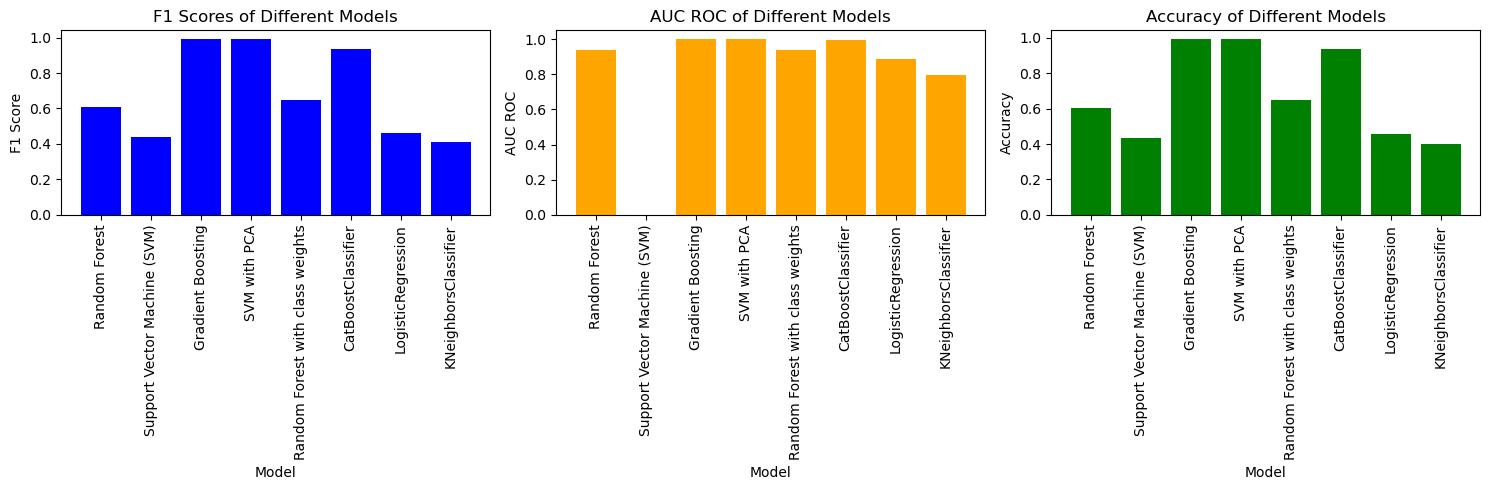

In [ ]:
plt.figure(figsize=(15, 5))

# Bar graph for F1 Score
plt.subplot(1, 3, 1)
plt.bar(results_df['model'], results_df['f1'], color='blue')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Models')
plt.xticks(rotation=90)

# Bar graph for AUC ROC
plt.subplot(1, 3, 2)
plt.bar(results_df['model'], results_df['AUC_ROC'], color='orange')
plt.xlabel('Model')
plt.ylabel('AUC ROC')
plt.title('AUC ROC of Different Models')
plt.xticks(rotation=90)

# Bar graph for Accuracy
plt.subplot(1, 3, 3)
plt.bar(results_df['model'], results_df['Accuracy'], color='green')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=90)

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('my_graphs_pudding.png') 
plt.show()

- The CatBoostClassifier works best for the AUC_ROC, accuracy, and f1 metrics. Metrics for all the models tried were collected in the above table for easy comparison. A constant model would be right only 10% of the time. CatBoost had an overall accuracy of .57. Classification reports were generated for each model for ease of comparison across individual genres and models. Support Vector Machines are incompatible with roc_auc scores so a np.nan was left in that spot in the table and graphs.
- The easiest way to improve models' performances would be to add more data to the 'clean_spotify_set2.csv' file. The code has been set up to allow for automatic updating of the dataset to increase the variety of data it has to work with, while checking for duplicates.
- This code originally classified between 20 genres. The genres were shrunk to raise overall accuracy metrics for the models and allow the models to make clearer distinctions. The top ten most accurate genres from that list of 20 were chosen. Classical music consistently was the most identifiable across models. Of the original 20, the genre 'Soul' was least likely to be recognized which seems strangely appropriate of a computer. The API call still requests 20 different genres even though only ten were used for model training to try to keep the dataset as balanced as possible.
- The predict_genre() method was not able to be tested given certain restrictions with the API and relatively tight timeframe for this project.